In [2]:
import modin.pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

In [3]:
import gc

In [1]:
# loading in data
slurm = pd.read_csv("/mnt/scratch/tairaeli/cmse_dat/slurm_cleaned_final.csv", delimiter="|")
slurm = slurm.drop(columns=["Unnamed: 28"])
slurm.columns = ["Unnamed: 0.1","Unnamed: 0",'JobID', 'User', 'Group', 'Submit', 'Start', 'End', 'Elapsed', 'State',
       'Account', 'AssocID', 'Partition', 'Timelimit', 'UserCPU', 'SystemCPU',
       'TotalCPU', 'CPUTime', 'CPUTimeRAW', 'ReqCPUS', 'AllocCPUS', 'ReqMem',
       'MaxRSS', 'ReqNodes', 'NNodes', 'NodeList', 'ReqTRES', 'AllocTRES']
slurm = slurm.drop(columns=["Unnamed: 0.1","Unnamed: 0"])
slurm.head()

NameError: name 'pd' is not defined

In [21]:
slurm.to_csv("/mnt/scratch/tairaeli/cmse_dat/slurm_cleaned_final.csv")

In [8]:
slurm_old = pd.read_csv("/mnt/research/CMSE495-SS24-ICER/slurm_usage/DID_FINAL_SLURM_OCT_2023.csv",
                        delimiter='|', nrows=4e6)
slurm_old.head()

,Unnamed: 0.1,Unnamed: 0,JobID,User,Group,Submit,Start,End,Elapsed,State,...,CPUTimeRAW,ReqCPUS,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES
0,0,0,31496544,user_679,group_121,2023-03-21T11:13:45,Unknown,Unknown,00:00:00,PENDING,...,0,28,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN
1,1,1,31497932,user_679,group_121,2023-03-21T11:31:18,Unknown,Unknown,00:00:00,PENDING,...,0,28,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN
2,2,2,31993628,user_105,group_114,2023-03-22T18:19:12,Unknown,Unknown,00:00:00,PENDING,...,0,12,0,150G,NaN,1,1,None assigned,"billing=23347,cpu=12,gres/gpu=8,mem=150G,node=1",NaN
3,3,3,39087660,user_652,group_054,2023-04-04T13:09:10,Unknown,Unknown,00:00:00,PENDING,...,0,640,0,20G,NaN,10,10,None assigned,"billing=3112,cpu=640,mem=20G,node=10",NaN
4,4,4,59062820,user_188,group_046,2023-05-08T09:58:20,2024-01-01T00:58:57,2024-01-01T00:59:06,00:00:09,COMPLETED,...,360,40,40,8G,NaN,1,1,skl-029,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1"


In [9]:
slurm_old[slurm_old["Timelimit"].isna()]["Timelimit"]

202        NaN
203        NaN
204        NaN
206        NaN
207        NaN
          ... 
3999993    NaN
3999994    NaN
3999996    NaN
3999997    NaN
3999999    NaN
Name: Timelimit, Length: 2656268, dtype: object

In [3]:
id = slurm["JobID"].value_counts().index
id

In [4]:
spec_user = slurm[slurm["JobID"] == 90361456]

# spec_user["NodeList"].value_counts()

am_70 = spec_user[spec_user["NodeList"] == "amr-070"]

cpu_time_list = am_70["CPUTimeRAW"].value_counts()

cpu_time_list[cpu_time_list == 2]

CPUTimeRAW
4341040    2
783660     2
788000     2
812560     2
783220     2
815520     2
2694720    2
Name: count, dtype: int64

In [5]:
spec_user[spec_user["CPUTimeRAW"] == 815520]

,JobID,User,Group,Submit,Start,End,Elapsed,State,Account,AssocID,...,CPUTimeRAW,ReqCPUS,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES
691,90361456,user_606,group_000,2023-09-25T14:22:02,2023-09-30T22:05:41,2023-10-01T09:25:17,11:19:36,COMPLETED,account_085,assocID_011,...,815520,20,20,160G,NaN,1,1,amr-070,"billing=24903,cpu=20,mem=160G,node=1","billing=24903,cpu=20,mem=160G,node=1"
692,90361456,user_258,group_010,2023-09-30T22:05:41,2023-09-30T22:05:41,2023-10-01T09:25:17,11:19:36,COMPLETED,account_085,assocID_011,...,815520,20,20,NaN,132740564K,1,1,amr-070,NaN,"cpu=20,mem=160G,node=1"


(array([11., 21., 10.,  8.,  8.,  7.,  4.,  4.,  3.,  1.,  2.,  2.,  1.,
         0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1.  ,  4.08,  7.16, 10.24, 13.32, 16.4 , 19.48, 22.56, 25.64,
        28.72, 31.8 , 34.88, 37.96, 41.04, 44.12, 47.2 , 50.28, 53.36,
        56.44, 59.52, 62.6 , 65.68, 68.76, 71.84, 74.92, 78.  ]),
 <BarContainer object of 25 artists>)

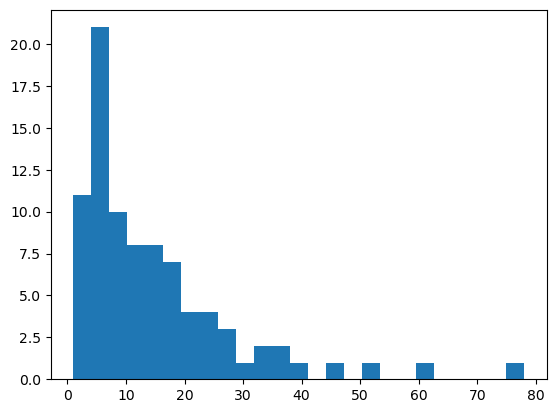

In [6]:
plt.hist(spec_user["NodeList"].value_counts().values, 25)

In [5]:
def CleanSLURMDat(dat):
    '''
    Aggregates all submitted jobs together, removing all batch/extern 
    jobs and including said information into a single job. Excludes
    jobs that do not have a clear '.batch' and '.extern' files

    args:

        dat - the slurm dataset 
    
    returns:

        out_df - the aggregated version of the slurm dataset
    '''
    
    job_list = slurm["JobID"].value_counts().index

    out_df = pd.DataFrame(columns=dat.keys())

    for i,job in enumerate(job_list):

        jdat = dat[dat["JobID"] == job]

        cpu_time_list = jdat["CPUTimeRAW"].value_counts()
        cpu_time_list = cpu_time_list[cpu_time_list == 2].index

        for cpu_time in cpu_time_list:

            ajob = jdat[jdat["CPUTimeRAW"] == cpu_time]

            batch_job = ajob[ajob["User"] == "user_258"]

            ag_job = ajob[ajob["User"] != "user_258"]

            if len(ag_job["User"]) == 0:
                print("Weird Job",ajob["JobID"])
                print("No aggregate job")
                continue
            
            if len(ag_job["User"]) == 2:
                print("Weird Job",ajob["JobID"])
                print("2 copies of aggregate job")
                continue

            assert len(ag_job["User"]) == 1, "New edge case discovered!"

            ag_job.loc[ag_job.index[0],"MaxRSS"] = batch_job["MaxRSS"].values[0]

            out_df = pd.concat([out_df,ag_job])
        
        if i%1e5==0:
            gc.collect()

    return out_df
    

In [6]:
CleanSLURMDat(slurm).to_csv("/mnt/scratch/tairaeli/cmse_dat/modin_test.csv")


the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


Weird Job 3055762    95132492
3232271    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3334438    95132492
3569958    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056395    95132492
3232904    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056017    95132492
3232526    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056407    95132492
3232916    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233564    95132492
3332866    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056287    95132492
3232796    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:05:02,846 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-04-02 22:05:07,992 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-04-02 22:05:12,885 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-04-02 22:05:17,707 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-04-02 22:05:23,349 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-04-02 22:05:28,775 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-04-02 22:05:35,218 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2024-04-02 22:05:40,548 - distributed.utils_perf - WARNING - full garbage collections took

2024-04-02 22:05:58,948 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


Weird Job 3233750    95132492
3332989    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:06:16,152 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


Weird Job 3056389    95132492
3232898    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234485    95132492
3333715    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233606    95132492
3332887    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234272    95132492
3333502    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3334486    95132492
3569973    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:07:44,198 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


Weird Job 3056059    95132492
3232568    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3334414    95132492
3569946    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:08:22,902 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


Weird Job 3056404    95132492
3232913    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233678    95132492
3332935    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028503    95132492
3054205    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056863    95132492
3233372    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233642    95132492
3332908    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233726    95132492
3332971    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233786    95132492
3333022    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056431    95132492
3232940    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029289    95132492
3054991    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3334519    95132492
3569985    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234308    95132492
3333538    95132492
Name: JobID, dtype: 

2024-04-02 22:12:46,014 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


Weird Job 3056557    95132492
3233066    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055915    95132492
3232424    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056419    95132492
3232928    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234980    95132492
3334210    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056263    95132492
3232772    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029301    95132492
3055003    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234524    95132492
3333754    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234344    95132492
3333574    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:15:36,083 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


Weird Job 3234500    95132492
3333730    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055585    95132492
3232106    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056188    95132492
3232697    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234068    95132492
3333298    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234512    95132492
3333742    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:17:18,710 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


Weird Job 3056743    95132492
3233252    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029217    95132492
3054919    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056791    95132492
3233300    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056839    95132492
3233348    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055753    95132492
3232262    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056575    95132492
3233084    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055639    95132492
3232157    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028791    95132492
3054493    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234572    95132492
3333802    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029481    95132492
3055183    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028683    95132492
3054385    95132492
Name: JobID, dtype: 

2024-04-02 22:21:11,886 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3056401    95132492
3232910    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234452    95132492
3333682    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028527    95132492
3054229    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056029    95132492
3232538    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:22:53,130 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3233540    95132492
3332854    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056167    95132492
3232676    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028869    95132492
3054571    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:23:54,922 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3334435    95132492
3569955    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056077    95132492
3232586    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234668    95132492
3333898    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:24:58,571 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3056035    95132492
3232544    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:25:23,667 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


Weird Job 3055729    95132492
3232238    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056011    95132492
3232520    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056437    95132492
3232946    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:26:30,140 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


Weird Job 3234620    95132492
3333850    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:26:43,360 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


Weird Job 3233744    95132492
3332986    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056551    95132492
3233060    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056083    95132492
3232592    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:28:09,255 - distributed.utils_perf - WARNING - full garbage collections took 11% CPU time recently (threshold: 10%)


Weird Job 3029121    95132492
3054823    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233834    95132492
3333070    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056161    95132492
3232670    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:29:17,658 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


Weird Job 3056779    95132492
3233288    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029565    95132492
3055267    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056251    95132492
3232760    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:30:09,356 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


Weird Job 3056227    95132492
3232736    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056503    95132492
3233012    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:31:04,812 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


Weird Job 3056071    95132492
3232580    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234797    95132492
3334027    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233648    95132492
3332914    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234548    95132492
3333778    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055723    95132492
3232235    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056707    95132492
3233216    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056359    95132492
3232868    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056599    95132492
3233108    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028599    95132492
3054301    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233714    95132492
3332962    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3235022    95132492
3334252    95132492
Name: JobID, dtype: 

2024-04-02 22:36:40,183 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3029325    95132492
3055027    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028821    95132492
3054523    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233666    95132492
3332926    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:37:40,117 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3056005    95132492
3232514    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055693    95132492
3232208    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:38:38,895 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3233738    95132492
3332980    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056677    95132492
3233186    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056833    95132492
3233342    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056269    95132492
3232778    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234764    95132492
3333994    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056641    95132492
3233150    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234116    95132492
3333346    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234428    95132492
3333658    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056299    95132492
3232808    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056023    95132492
3232532    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233840    95132492
3333076    95132492
Name: JobID, dtype: 

2024-04-02 22:44:51,094 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3029631    95132492
3055333    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028596    95132492
3054298    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234896    95132492
3334126    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029409    95132492
3055111    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:46:18,174 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3055828    95132492
3232337    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234224    95132492
3333454    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:47:03,634 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3028941    95132492
3054643    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056065    95132492
3232574    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055993    95132492
3232502    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:48:03,074 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3234992    95132492
3334222    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029193    95132492
3054895    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028803    95132492
3054505    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233858    95132492
3333094    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029658    95132492
3055360    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233843    95132492
3333079    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056521    95132492
3233030    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234038    95132492
3333268    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055918    95132492
3232427    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056725    95132492
3233234    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056281    95132492
3232790    95132492
Name: JobID, dtype: 

2024-04-02 22:55:38,928 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


Weird Job 3028437    95132492
3054139    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3334531    95132492
3569988    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055852    95132492
3232361    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:56:53,351 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


Weird Job 3234944    95132492
3334174    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3334498    95132492
3569979    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:57:42,843 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


Weird Job 3234182    95132492
3333412    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:58:15,880 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


Weird Job 3028863    95132492
3054565    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:58:31,936 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2024-04-02 22:58:45,534 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


Weird Job 3234965    95132492
3334195    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029313    95132492
3055015    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 22:59:35,675 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3056191    95132492
3232700    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233732    95132492
3332977    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:00:24,347 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3028659    95132492
3054361    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056509    95132492
3233018    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234320    95132492
3333550    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:01:44,825 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


Weird Job 3028707    95132492
3054409    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234836    95132492
3334066    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233846    95132492
3333082    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:03:08,129 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


Weird Job 3234692    95132492
3333922    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029607    95132492
3055309    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:03:59,241 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


Weird Job 3233582    95132492
3332875    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:04:30,861 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


Weird Job 3029139    95132492
3054841    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028611    95132492
3054313    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028929    95132492
3054631    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055975    95132492
3232484    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056257    95132492
3232766    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234656    95132492
3333886    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056845    95132492
3233354    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:07:27,357 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)
2024-04-02 23:07:44,606 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


Weird Job 3056491    95132492
3233000    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056755    95132492
3233264    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234686    95132492
3333916    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234332    95132492
3333562    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028563    95132492
3054265    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029331    95132492
3055033    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056587    95132492
3233096    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056383    95132492
3232892    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3235004    95132492
3334234    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028455    95132492
3054157    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056119    95132492
3232628    95132492
Name: JobID, dtype: 

2024-04-02 23:12:00,320 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


Weird Job 3029223    95132492
3054925    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:12:30,479 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


Weird Job 3056341    95132492
3232850    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055603    95132492
3232121    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:13:15,533 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


Weird Job 3233690    95132492
3332944    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:13:29,152 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)
2024-04-02 23:13:42,676 - distributed.utils_perf - WARNING - full garbage collections took 15% CPU time recently (threshold: 10%)


Weird Job 3028479    95132492
3054181    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056353    95132492
3232862    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056443    95132492
3232952    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056101    95132492
3232610    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3235016    95132492
3334246    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233612    95132492
3332893    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3334450    95132492
3569964    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234260    95132492
3333490    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:16:40,533 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3056236    95132492
3232745    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056608    95132492
3233117    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056464    95132492
3232973    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234893    95132492
3334123    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056440    95132492
3232949    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:18:25,524 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3056020    95132492
3232529    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234653    95132492
3333883    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056647    95132492
3233156    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056452    95132492
3232961    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234257    95132492
3333487    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233708    95132492
3332959    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234737    95132492
3333967    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056584    95132492
3233093    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234437    95132492
3333667    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:21:54,131 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3056560    95132492
3233069    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056128    95132492
3232637    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:22:59,936 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3233876    95132492
3333112    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056380    95132492
3232889    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056044    95132492
3232553    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:24:17,539 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3334399    95132492
3569943    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233453    95132492
3332806    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:25:01,590 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3234704    95132492
3333934    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055615    95132492
3232133    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3334363    95132492
3569937    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055675    95132492
3232193    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056692    95132492
3233201    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234173    95132492
3333403    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3334483    95132492
3569970    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055609    95132492
3232127    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055579    95132492
3232103    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056620    95132492
3233129    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233672    95132492
3332932    95132492
Name: JobID, dtype: 

2024-04-02 23:29:13,830 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3334507    95132492
3569982    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233468    95132492
3332815    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233393    95132492
3332785    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233756    95132492
3332995    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234929    95132492
3334159    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3334495    95132492
3569976    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234605    95132492
3333835    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055612    95132492
3232130    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056635    95132492
3233144    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056428    95132492
3232937    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233780    95132492
3333016    95132492
Name: JobID, dtype: 

2024-04-02 23:36:57,879 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3234197    95132492
3333427    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:37:29,772 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3233813    95132492
3333049    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233609    95132492
3332890    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056008    95132492
3232517    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:38:31,646 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3233573    95132492
3332869    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055564    95132492
3232088    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:39:31,933 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3055600    95132492
3232118    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055708    95132492
3232220    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233537    95132492
3332851    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233789    95132492
3333025    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233825    95132492
3333061    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233429    95132492
3332800    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055720    95132492
3232232    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055660    95132492
3232178    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233705    95132492
3332956    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233645    95132492
3332911    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:43:31,628 - distributed.utils_perf - WARNING - full garbage collections took 12% CPU time recently (threshold: 10%)


Weird Job 3055756    95132492
3232265    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233549    95132492
3332857    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056416    95132492
3232925    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056476    95132492
3232985    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234185    95132492
3333415    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234665    95132492
3333895    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233681    95132492
3332938    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234677    95132492
3333907    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233504    95132492
3332833    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234377    95132492
3333607    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056107    95132492
3232616    95132492
Name: JobID, dtype: 

2024-04-02 23:49:49,802 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3234149    95132492
3333379    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233441    95132492
3332803    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056392    95132492
3232901    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233525    95132492
3332845    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233801    95132492
3333037    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:51:34,439 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3233489    95132492
3332824    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056080    95132492
3232589    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056116    95132492
3232625    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3055576    95132492
3232100    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:53:14,991 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3056371    95132492
3232880    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233777    95132492
3333013    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028995    95132492
3054697    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:54:13,712 - distributed.utils_perf - WARNING - full garbage collections took 13% CPU time recently (threshold: 10%)


Weird Job 3056068    95132492
3232577    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233576    95132492
3332872    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029205    95132492
3054907    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234632    95132492
3333862    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3028461    95132492
3054163    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3234164    95132492
3333394    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3233420    95132492
3332797    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3029085    95132492
3054787    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056533    95132492
3233042    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3056311    95132492
3232820    95132492
Name: JobID, dtype: int64
No aggregate job


2024-04-02 23:58:42,990 - distributed.utils_perf - WARNING - full garbage collections took 14% CPU time recently (threshold: 10%)


Weird Job 3029454    95132492
3055156    95132492
Name: JobID, dtype: int64
No aggregate job
Weird Job 3235037    95132492
3334267    95132492
Name: JobID, dtype: int64
No aggregate job


: 

In [8]:
ndf = pd.read_csv("/mnt/scratch/tairaeli/cmse_dat/clean_slurm.csv")
ndf.head()

,Unnamed: 0,JobID,User,Group,Submit,Start,End,Elapsed,State,Account,...,CPUTimeRAW,ReqCPUS,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES
0,336748,92134676,user_272,group_154,2023-10-02T19:49:11,2023-10-02T19:51:56,2023-10-02T23:20:44,03:28:48,COMPLETED,account_016,...,12528,1,1,200G,2281632K,1,1,acm-025,"billing=31129,cpu=1,mem=200G,node=1","billing=31129,cpu=1,mem=200G,node=1"
1,336736,92134676,user_272,group_154,2023-10-02T19:49:11,2023-10-02T19:51:51,2023-10-02T23:34:24,03:42:33,COMPLETED,account_016,...,13353,1,1,200G,2323692K,1,1,amr-204,"billing=31129,cpu=1,mem=200G,node=1","billing=31129,cpu=1,mem=200G,node=1"
2,336733,92134676,user_272,group_154,2023-10-02T19:49:11,2023-10-02T19:49:16,2023-10-02T23:38:41,03:49:25,COMPLETED,account_016,...,13765,1,1,200G,2279580K,1,1,amr-241,"billing=31129,cpu=1,mem=200G,node=1","billing=31129,cpu=1,mem=200G,node=1"
3,336730,92134676,user_272,group_154,2023-10-02T19:49:11,2023-10-02T19:49:16,2023-10-02T23:40:47,03:51:31,COMPLETED,account_016,...,13891,1,1,200G,2280680K,1,1,amr-241,"billing=31129,cpu=1,mem=200G,node=1","billing=31129,cpu=1,mem=200G,node=1"
4,336727,92134676,user_272,group_154,2023-10-02T19:49:11,2023-10-02T19:49:16,2023-10-02T23:47:02,03:57:46,COMPLETED,account_016,...,14266,1,1,200G,2357408K,1,1,amr-241,"billing=31129,cpu=1,mem=200G,node=1","billing=31129,cpu=1,mem=200G,node=1"


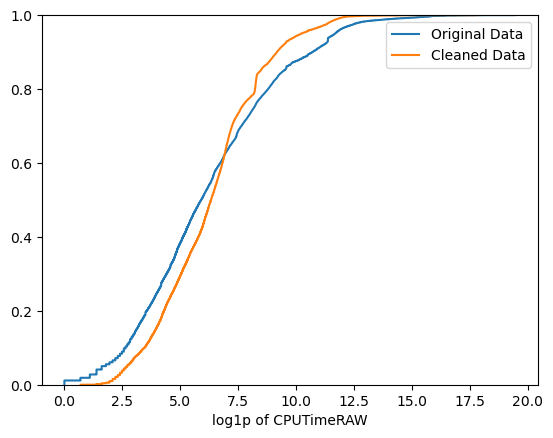

In [9]:
plt.ecdf(np.log1p(slurm["CPUTimeRAW"].astype("float")), label="Original Data")
plt.ecdf(np.log1p(ndf["CPUTimeRAW"].astype("float")), label="Cleaned Data")
plt.xlabel("log1p of CPUTimeRAW")
plt.legend()

In [10]:
# convert ReqMem to a uniform measurement (assuming 'M' for MB and 'G' for GB and 'K' for KB)
def convert_memory(mem_str):
    '''
    Convert memory units to MegaBytes unit float.
    '''
    if type(mem_str) == float:
        return np.nan
    if mem_str.endswith('M'):
        return float(mem_str[:-1]) # remove 'M' and convert to float
    elif mem_str.endswith('K'):
        return float(mem_str[:-1]) / 1000
    elif mem_str.endswith('G'):
        return float(mem_str[:-1]) * 1e3  # convert MB to KB
    elif mem_str.endswith('T'):
        return float(mem_str[:-1]) * 1e6 # convert MB to T
    elif mem_str == np.nan:
        return np.nan
    
# Function to parse time data columns: TimeLimit and Elapsed
def parse_time_string(time_str):
    """Convert a time string into a timedelta object."""
    days = 0
    
    if type(time_str) == float:
        return np.nan
    
    if '-' in time_str:
        days, time_str = time_str.split('-')
        days = int(days)

    parts = time_str.split(':')
    hours, minutes, seconds = map(int, parts) if len(parts) == 3 else (int(parts[0]), int(parts[1]), 0)
    return timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)

In [11]:
ndf1 = ndf.dropna()

In [12]:
ndf1.keys()

Index(['Unnamed: 0', 'JobID', 'User', 'Group', 'Submit', 'Start', 'End',
       'Elapsed', 'State', 'Account', 'AssocID', 'Partition', 'Timelimit',
       'UserCPU', 'SystemCPU', 'TotalCPU', 'CPUTime', 'CPUTimeRAW', 'ReqCPUS',
       'AllocCPUS', 'ReqMem', 'MaxRSS', 'ReqNodes', 'NNodes', 'NodeList',
       'ReqTRES', 'AllocTRES'],
      dtype='object')

In [13]:
# doing some numerical conversion
def conv_to_num(df):
    ndf = df.copy()
    ndf.loc[:,"Elapsed"] = df["Elapsed"].apply(parse_time_string)
    ndf.loc[:,"Timelimit"] = df["Timelimit"].apply(parse_time_string)
    ndf.loc[:,"MaxRSS"] = df["MaxRSS"].apply(convert_memory)
    ndf.loc[:,"ReqMem"] = df["ReqMem"].apply(convert_memory)
    ndf.loc[:,"CPUTime"] = df["CPUTime"].apply(parse_time_string)

    return ndf

ndf = conv_to_num(ndf.dropna())
slurm = conv_to_num(slurm)
# ndf1["Elapsed"] = ndf1["Elapsed"].apply(parse_time_string)
# ndf1["Timelimit"] = ndf1["Timelimit"].apply(parse_time_string)
# ndf1["MaxRSS"] = ndf1["MaxRSS"].apply(convert_memory)
# ndf1["CPUTime"] = ndf1["CPUTime"].apply(parse_time_string)
# ndf1.keys()

In [14]:
ndf.head()

,Unnamed: 0,JobID,User,Group,Submit,Start,End,Elapsed,State,Account,...,CPUTimeRAW,ReqCPUS,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES
0,336748,92134676,user_272,group_154,2023-10-02T19:49:11,2023-10-02T19:51:56,2023-10-02T23:20:44,0 days 03:28:48,COMPLETED,account_016,...,12528,1,1,200000.0,2281.632,1,1,acm-025,"billing=31129,cpu=1,mem=200G,node=1","billing=31129,cpu=1,mem=200G,node=1"
1,336736,92134676,user_272,group_154,2023-10-02T19:49:11,2023-10-02T19:51:51,2023-10-02T23:34:24,0 days 03:42:33,COMPLETED,account_016,...,13353,1,1,200000.0,2323.692,1,1,amr-204,"billing=31129,cpu=1,mem=200G,node=1","billing=31129,cpu=1,mem=200G,node=1"
2,336733,92134676,user_272,group_154,2023-10-02T19:49:11,2023-10-02T19:49:16,2023-10-02T23:38:41,0 days 03:49:25,COMPLETED,account_016,...,13765,1,1,200000.0,2279.58,1,1,amr-241,"billing=31129,cpu=1,mem=200G,node=1","billing=31129,cpu=1,mem=200G,node=1"
3,336730,92134676,user_272,group_154,2023-10-02T19:49:11,2023-10-02T19:49:16,2023-10-02T23:40:47,0 days 03:51:31,COMPLETED,account_016,...,13891,1,1,200000.0,2280.68,1,1,amr-241,"billing=31129,cpu=1,mem=200G,node=1","billing=31129,cpu=1,mem=200G,node=1"
4,336727,92134676,user_272,group_154,2023-10-02T19:49:11,2023-10-02T19:49:16,2023-10-02T23:47:02,0 days 03:57:46,COMPLETED,account_016,...,14266,1,1,200000.0,2357.408,1,1,amr-241,"billing=31129,cpu=1,mem=200G,node=1","billing=31129,cpu=1,mem=200G,node=1"


In [17]:
def gen_compare_plot(feature, out_dir):
    plt.ecdf(np.log1p(slurm[feature].astype("float").dropna()), label="Original Data")
    plt.ecdf(np.log1p(ndf[feature].astype("float")), label="Cleaned Data")
    plt.xlabel(f"log1p of {feature}")
    plt.legend()
    plt.savefig(out_dir+"clean_compare_"+feature)
    plt.show()

Making plot for: CPUTimeRAW


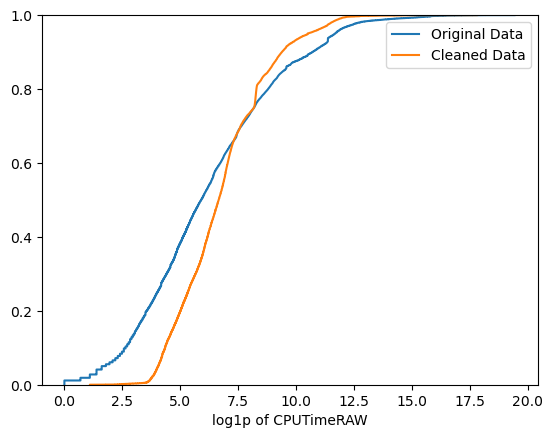

Making plot for: ReqCPUS


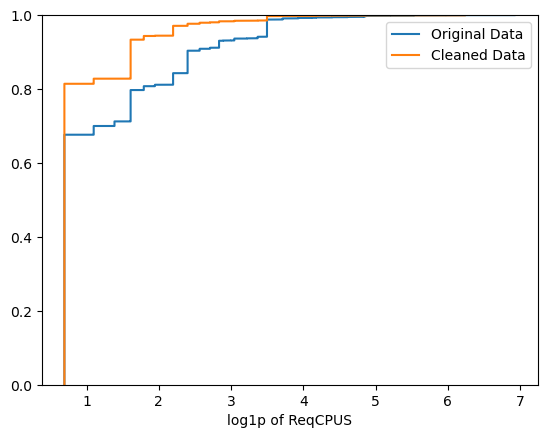

Making plot for: AllocCPUS


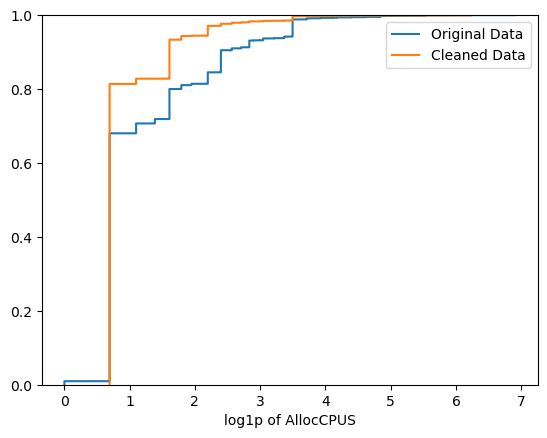

Making plot for: ReqNodes


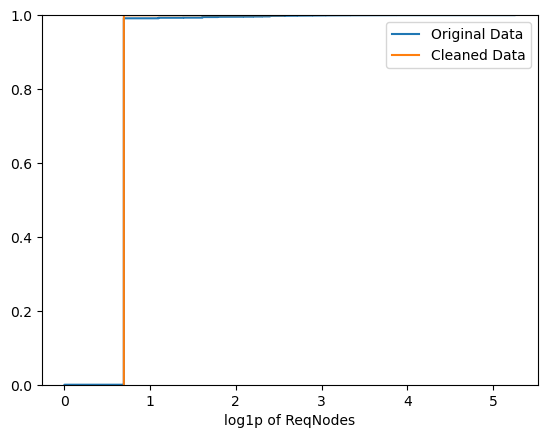

Making plot for: NNodes


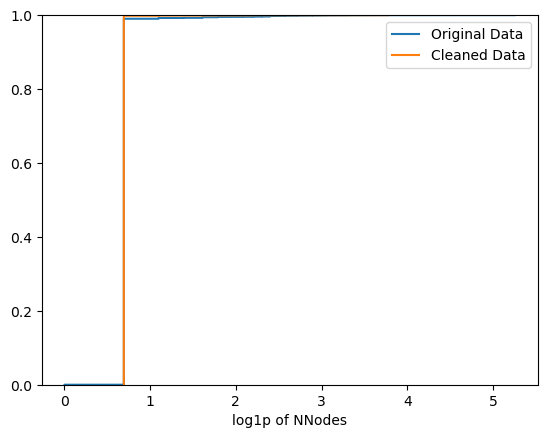

Making plot for: MaxRSS


ValueError: ecdf() does not support NaNs

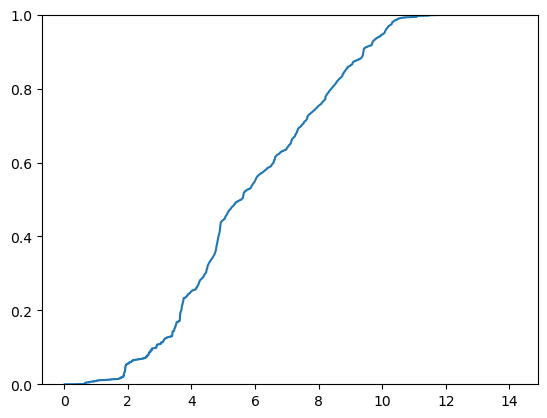

In [18]:
out_dir = "/mnt/scratch/tairaeli/cmse_dat/"

num_keys = ['CPUTimeRAW','ReqCPUS', 'AllocCPUS', 'ReqNodes', 'NNodes',]

for key in num_keys:
    print("Making plot for:",key)
    gen_compare_plot(key, out_dir)

In [49]:
slurm[['CPUTimeRAW', 'ReqCPUS', 'AllocCPUS', 'ReqMem',
       'MaxRSS', 'ReqNodes', 'NNodes']]

Index(['JobID', 'User', 'Group', 'Submit', 'Start', 'End', 'Elapsed', 'State',
       'Account', 'AssocID', 'Partition', 'Timelimit', 'UserCPU', 'SystemCPU',
       'TotalCPU', 'CPUTime', 'CPUTimeRAW', 'ReqCPUS', 'AllocCPUS', 'ReqMem',
       'MaxRSS', 'ReqNodes', 'NNodes', 'NodeList', 'ReqTRES', 'AllocTRES'],
      dtype='object')

In [55]:
slurm["NNodes"]

0         1
1         1
2         1
3        10
4         1
         ..
99995     1
99996     1
99997     1
99998     1
99999     1
Name: NNodes, Length: 100000, dtype: int64